<a href="https://colab.research.google.com/github/kimdain0222/deep_learning/blob/main/6%EC%A3%BC%EC%B0%A8_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B3%BC%EC%A0%9C_202463004_%EA%B9%80%EB%8B%A4%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
np.random.randn(1,1)

array([[-1.34321621]])

In [23]:
#< 두 개의 뚜렷이 구분되는 클래스를 만들어서 로지스틱 회귀 모델이 학습하기 쉬운 데이터셋을 생성한 것>
# ver.1_ 하드코딩

X=np.random.randn(100,2)  # 100개의 2차원 데이터 포인트 생성 (평균 0, 표준편차 1)
X[0:50, :]=X[0:50, :]-2   # 첫 50개: 클래스 0: 중심을 (-2, -2) 주변으로 이동
X[50:100, :]=X[50:100, :]+2   # 나머지 50개: 클래스 1: 중심을 (2, 2) 주변으로 이동
t = np.zeros((100, 1))  # (100,1) shape로 생성
t[50:100] = 1  # 두 번째 클래스는 1로 설정

In [24]:
#ver.2_ 변수 사용 (변수만 수정하주면 돼서 좋음)

n=100  # 전체 데이터 포인트 개수를 100개로 설정
n_class=50  # 첫 번째 클래스의 데이터 개수를 50개로 설정 (두 번째 클래스도 50개)

X=np.random.randn(n,2)  # 100x2 shape의 표준정규분포 난수 행렬 생성 (평균 0, 표준편차 1)
X[:n_class, :]=X[:n_class, :]-2  # 첫 50개 데이터 포인트를 -2만큼 이동 (클래스 0: 왼쪽 아래로)
X[n_class:, :]=X[n_class:, :]+2  # 나머지 50개 데이터 포인트를 +2만큼 이동 (클래스 1: 오른쪽 위로)
t=np.zeros((n,1))  # 100x1 shape의 라벨 배열을 0으로 초기화

t[n_class:]=1  # 인덱스 50번부터 끝까지(50~99)의 라벨을 1로 설정 (클래스 1 표시)



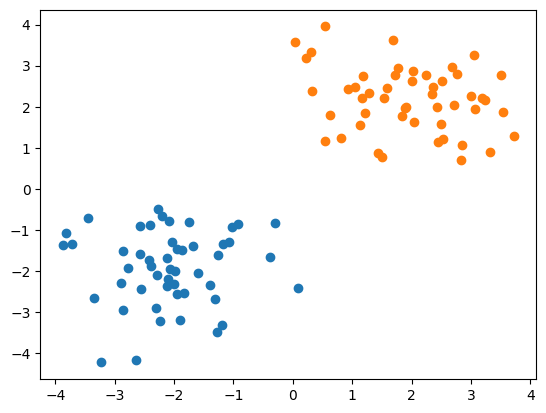

In [25]:
plt.scatter(X[:n_class, 0], X[:n_class, 1])  #클래스 0의 좌표(파란색)
plt.scatter(X[n_class:, 0], X[n_class:, 1])  #클래스 1의 좌표(노란색)


In [15]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [16]:
# <MSE (=Mean Squared Error) 손실 함수 계산하는 도구 만들기>
# y-t =오차 계산
def mse(y,t):
  return 0.5 * np.mean((y-t)**2)  #예측값(y)과 실제값(t)의 차이를 제곱해서 평균내는 함수
#0.5를 곱하는 이유는 미분을 쉽게하기 위해
#in 로지스틱 회귀_ y: 시그모이드 출력 (0~1 사이 확률),t: 실제 라벨 (0 또는 1), mse(y,t): 모델이 얼마나 틀렸는지 측정
#0에 가까울 수록 예측 정확

In [26]:
w=np.random.randn(2,1) #가중치(w) 초기화_ (x, y 좌표)를 가지고 있어 2, 이진 분류라서 확률값 1
b=np.random.randn() #편향(b) 초기화_ 단일 스칼라(숫) 값 생성 so, 경계를 위/아래로 움직일 수 있게 해주는 추가 점수라는 뜻
print(w) #첫 번째 특성(x₁)의 가중치.두 번째 특성(x₂)의 가중치. 이렇게 2개 출력됨
print(w.shape) #위의 (2,1)
print(b) #결정 경계를 움직이는 기준점 조정값 출력

[[0.16283263]
 [0.53497388]]
(2, 1)
0.4086626797290134


In [27]:
# <순전파(Forward Propagation) 코드>

a=np.dot(X,w)+b  #선형 결합 계산 - "가중치 합 + 편향"
y=sigmoid(a)   #0~1 사이의 확률로 변환

print(mse(y,t)) #mse 최종 결과

0.028394978628005562


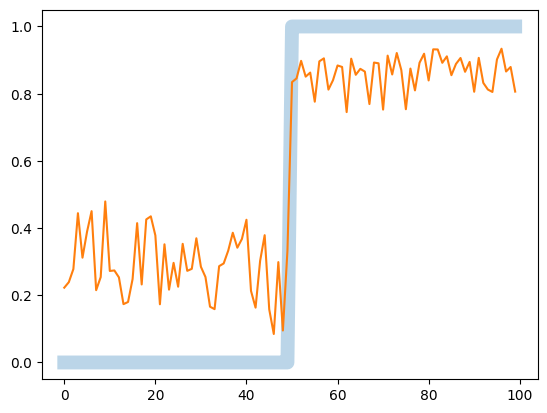

In [28]:
#<실제 정답과 모델 예측을 비교하는 시각화하는 코드>

x_plot=np.arange(100)  #데이터 인덱스 생성 (x축 값)_0-99
plt.plot(x_plot,t,linewidth=10, alpha=0.3)  #실제 정답을 두꺼한 반투명 선으로 표시하겠다
plt.plot(x_plot,y)  #모델이 예측한 확률값을 일반 선으로 표시하겠다

In [29]:
#<학습을 시작하기 전에 필요한 조건들을 걸어놓는 것!>

eta=0.1  #학습률- 한 번에 얼마나 업뎃할지(Learning Rate)
lter=100  #학습 반복 횟수
mse_lter=np.zeros(lter)  # 손실값 기록 배열- 학습 진행도를 기록할 공간 마련하기

In [30]:
for i in range(lter):
  #순전파 - 햔재 모델로 예측해보기 (예측)
  a=np.dot(X,w)+b   # 선형 결합 계산
  y=sigmoid(a)    # 확률값으로 변환

  # 그래디언트 계산 - 어느 방향으로 조정할지 (방향 찾기)
  dw = np.mean((y-t)*y*(1-y)*X, axis=0).reshape(-1,1)  # 가중치 그래디언트
  db = np.mean((y-t)*y*(1-y))   # 편향 그래디언트

  # 가중치 업데이트 - 조금씩 모델 개선하기 (조정)
  w = w - eta * dw   # 가중치 수정
  b = b - eta * db   # 편향 수정

  # 손실 기록 - 진행상황 기록하기 (기록)
  mse_lter[i] = mse(y,t)  # 현재 손실값 저장

print(w)  # 학습된 최종 가중치 (경계선의 기울기를 결정)
print(b)  # 학습된 최종 편향 (경계선의 위치 결정)

[[0.48153625]
 [0.79785034]]
0.3029052051137789


print(w)
[[0.48153625]
 [0.79785034]]
 :

w₁ = 0.48153625  # 첫 번째 특성(x₁)의 가중치

w₂ = 0.79785034  # 두 번째 특성(x₂)의 가중치

so, 두 번째 특성(x₂)이 첫 번째 특성(x₁)보다 약 1.66배 더 중요하게 학습됨



---


print(b)
0.3029052051137789

b가 없으면 경계선이 무조건 (0.0)을 지나야 하지만 b가 있으면 경계선이 자유롭게 움직일 수 있음



---

f(x) = w₁*x₁ + w₂*x₂ + b

(x) > 0 → 클래스 1

f(x) < 0 → 클래스 0


if) f(x) = 0.5*x₁ + 1.0*x₂ + 2.0 일 때,
결정 경계선의 방정식을 구하고 그래프로 나타내시오.

# 1. 결정 경계선 조건
f(x) = 0 인 경우가 경계선
0.5*x₁ + 1.0*x₂ + 2.0 = 0

# 2. x₂에 대해 정리
1.0*x₂ = -0.5*x₁ - 2.0
x₂ = -0.5*x₁ - 2.0

# 3. 기울기와 절편
기울기(m) = -0.5
y절편(b) = -2.0

so, 기울기가 -0.5이고 y절편이 -2인 직선. 이 선을 기준으로 위쪽은 클래스 1, 아래쪽은 클래스 0 영역임

In [31]:
a=np.dot(X,w)+b
y=sigmoid(a)

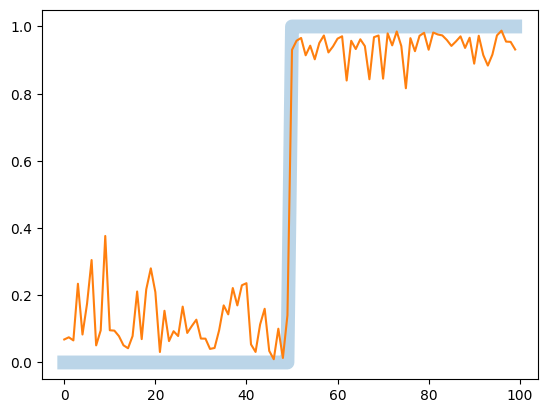

In [32]:
x_plot=np.arange(100)
plt.plot(x_plot,t,linewidth=10, alpha=0.3)
plt.plot(x_plot,y)

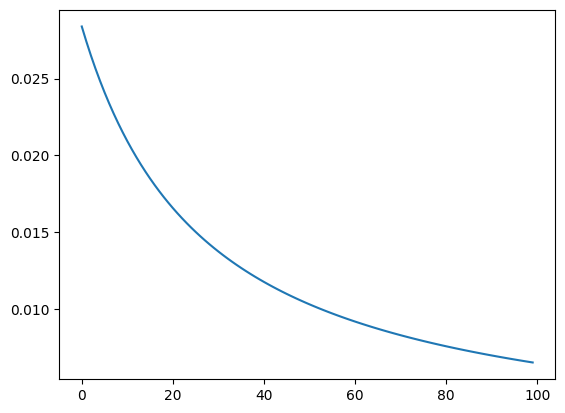

In [33]:
#<학습 곡선 시각화 코드>

x_plot=np.arange(lter)  #학습 횟수 배열 생성 (x축: 에폭 수)
plt.plot(x_plot,mse_lter)   # 각 스텝별 손실값 기록

#진동= 학습률 줄여야 함
#하향 곡선= 학습 잘됨
#평행선= 학습 안됨